In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
from imblearn.over_sampling import RandomOverSampler
import collections
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [3]:
df = pd.read_csv('creditcard.csv')
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

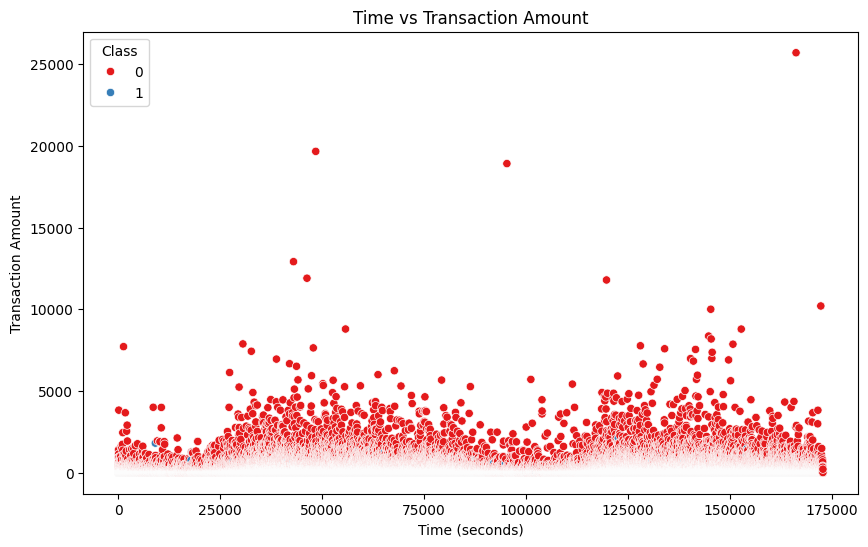

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='Set1')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-6-ee3436a0c415>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




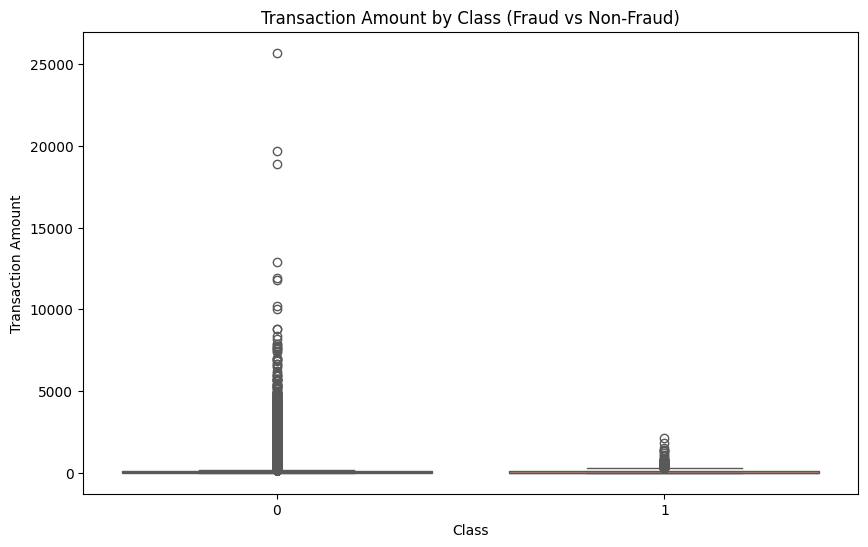

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Amount', palette='Set2')
plt.title('Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-7-fe0079432382>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




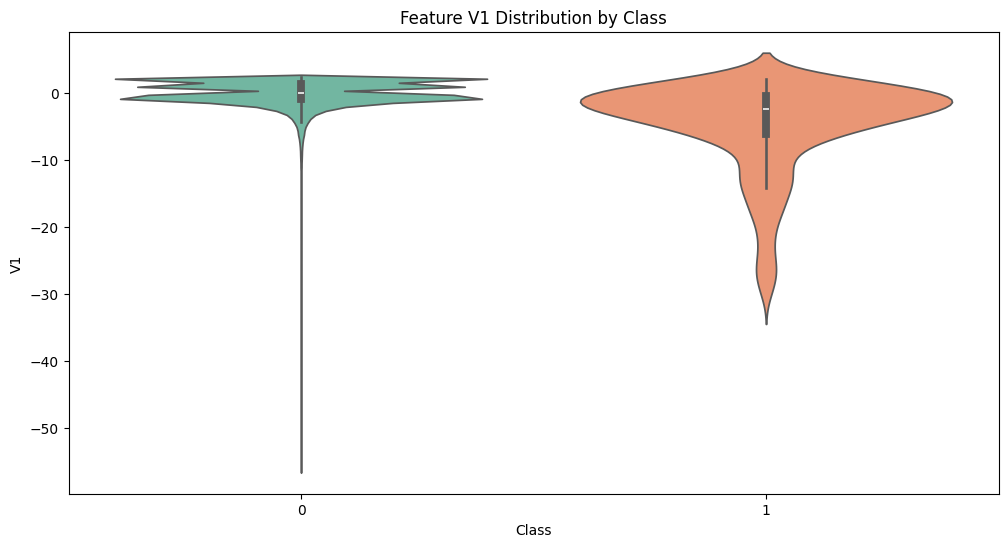

In [7]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Class', y='V1', palette='Set2')
plt.title('Feature V1 Distribution by Class')
plt.show()

In [8]:
df['Class'].value_counts()


,count
Class,
0,284315
1,492


In [9]:
x=df.drop(columns='Class',axis=1)
y=df.Class

In [11]:
x=df
y=df.Class

In [12]:
oversample=RandomOverSampler(sampling_strategy='minority',random_state=42)
xm,ym=oversample.fit_resample(x,y)
counter=collections.Counter(ym)
print(counter)

Counter({0: 284315, 1: 284315})


In [13]:
ym.info()

<class 'pandas.core.series.Series'>
RangeIndex: 568630 entries, 0 to 568629
Series name: Class
Non-Null Count   Dtype
--------------   -----
568630 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB


In [14]:
def detect_outliers(X, column, k=3):
    """Detects outliers in a column using the IQR method."""
    data = X[column]
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    iqr = Q3 - Q1
    lower_bound = Q1 - (k * iqr)
    upper_bound = Q3 + (k * iqr)
    outlier_indices = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outlier_indices

def remove_outliers(X, k=3):
    """Removes outliers from a DataFrame using the IQR method."""
    X_copy = X.copy()
    outlier_indices_all = np.array([], dtype=int)
    outlier_columns = []

    for column in X_copy.columns:
        outlier_indices = detect_outliers(X_copy, column, k)
        if len(outlier_indices) > 0:
            outlier_columns.append(column)
            outlier_indices_all = np.concatenate((outlier_indices_all, outlier_indices))
            outlier_indices_all = np.unique(outlier_indices_all)

    if len(outlier_indices_all) > 0:
        labels_to_remove = X_copy.index[outlier_indices_all]
        X_copy = X_copy.drop(labels_to_remove, axis=0)

    return X_copy, outlier_columns

In [15]:
xm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [16]:
temp_xm = xm[xm['Class'] == 1]
temp_xm = remove_outliers(temp_xm)[0]
new_X  = xm[xm['Class'] == 0]
temp_y = remove_outliers(new_X)[0]

X = pd.concat([temp_xm, temp_y])

In [17]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 441442 entries, 541 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    441442 non-null  float64
 1   V1      441442 non-null  float64
 2   V2      441442 non-null  float64
 3   V3      441442 non-null  float64
 4   V4      441442 non-null  float64
 5   V5      441442 non-null  float64
 6   V6      441442 non-null  float64
 7   V7      441442 non-null  float64
 8   V8      441442 non-null  float64
 9   V9      441442 non-null  float64
 10  V10     441442 non-null  float64
 11  V11     441442 non-null  float64
 12  V12     441442 non-null  float64
 13  V13     441442 non-null  float64
 14  V14     441442 non-null  float64
 15  V15     441442 non-null  float64
 16  V16     441442 non-null  float64
 17  V17     441442 non-null  float64
 18  V18     441442 non-null  float64
 19  V19     441442 non-null  float64
 20  V20     441442 non-null  float64
 21  V21     44144

In [18]:
rf_model = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=5,               # Maximum depth of each tree
    random_state=42,           # For reproducibility
)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, X['Class'], test_size=0.2, random_state=42)

In [21]:
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.4f}%")

Accuracy: 100.0000%


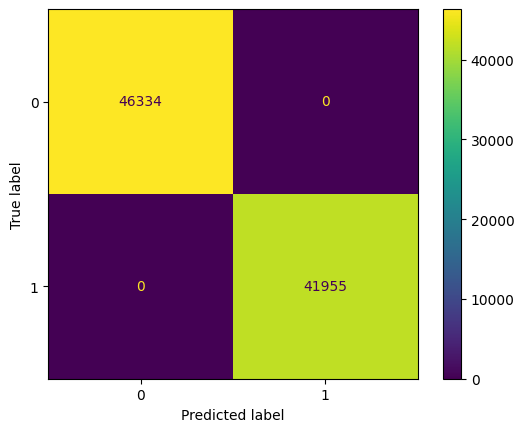

In [22]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

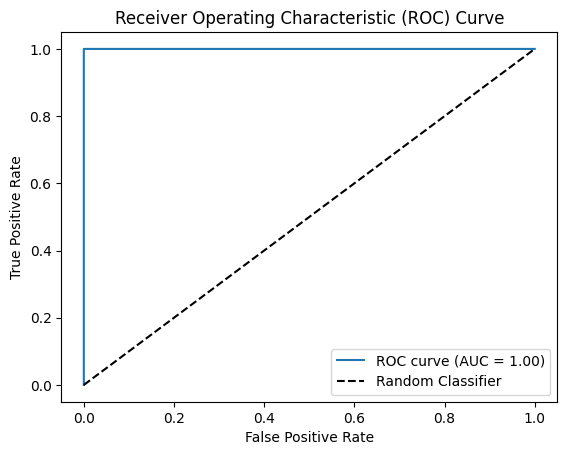

In [23]:
Y_hat_proba = rf_model.predict_proba(X_test.loc[:, :'Class'])
fpr, tpr, thresholds = roc_curve(y_test, Y_hat_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
print(f"roc-auc accuracy for imbalanced set: {auc(fpr, tpr)}")


roc-auc accuracy for imbalanced set: 1.0
